In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import axes
import os 
import pandas as pd

/cluster/apps/nss/gcc-6.3.0/python/3.7.4/x86_64/lib64/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
dir = '/cluster/home/kamara/Explain/csv/'

df_syn1 = pd.read_csv(os.path.join(dir, 'syn1.csv'), index_col = 0)
res = df_syn1.groupby(by=['sparsity', 'explainer_name']).mean()
res

num_test_nodes  gpu  f1_score_top  recall_top  \
sparsity explainer_name                                                  
0.00     distance                 200.0  1.0      0.673545    0.665000   
         gnnexplainer             200.0  1.0      0.328030    0.323333   
         ig_node                  200.0  1.0      0.889318    0.889167   
         occlusion                200.0  1.0      0.054167    0.054167   
         pagerank                 200.0  1.0      0.864167    0.864167   
         pgmexplainer             200.0  1.0      0.587500    0.587500   
         sa_node                  200.0  1.0      0.374545    0.374167   
0.50     distance                 200.0  1.0      0.679500    0.670833   
         gnnexplainer             200.0  1.0      0.320318    0.315000   
         ig_node                  200.0  1.0      0.889318    0.889167   
         occlusion                200.0  1.0      0.054167    0.054167   
         pagerank                 200.0  1.0      0.864167    0.864167   
         pgmexplainer             200.0  1.0      0.572500    0.572500   
         random                   200.0  1.0      0.000000    0.000000   
         sa_node                  200.0  1.0      0.374545    0.374167   
0.70     distance                 200.0  1.0      0.679500    0.670833   
         gnnexplainer             200.0  1.0      0.319591    0.312500   
         ig_node                  200.0  1.0      0.889318    0.889167   
         occlusion                200.0  1.0      0.054167    0.054167   
         pagerank                 200.0  1.0      0.864167    0.864167   
         pgmexplainer             200.0  1.0      0.582000    0.581667   
         sa_node                  200.0  1.0      0.374545    0.374167   
         subgraphx                200.0  1.0      0.777833    0.733333   
0.90     distance                 200.0  1.0      0.679500    0.670833   
         gnnexplainer             200.0  1.0      0.309939    0.303333   
         ig_node                  200.0  1.0      0.889318    0.889167   
         occlusion                200.0  1.0      0.054167    0.054167   
         pagerank                 200.0  1.0      0.864167    0.864167   
         pgmexplainer             200.0  1.0      0.586667    0.586667   
         random                   200.0  1.0      0.001667    0.001667   
         sa_node                  200.0  1.0      0.374545    0.374167   
         subgraphx                200.0  1.0      0.782076    0.737500   
0.95     distance                 200.0  1.0      0.679500    0.670833   
         gnnexplainer             200.0  1.0      0.332424    0.324167   
         ig_node                  200.0  1.0      0.889318    0.889167   
         occlusion                200.0  1.0      0.054167    0.054167   
         pagerank                 200.0  1.0      0.864167    0.864167   
         pgmexplainer             200.0  1.0      0.592045    0.591667   
         sa_node                  200.0  1.0      0.374545    0.374167   
         subgraphx                200.0  1.0      0.780182    0.731667   
0.98     distance                 200.0  1.0      0.679500    0.670833   
         gnnexplainer             200.0  1.0      0.313091    0.306667   
         ig_node                  200.0  1.0      0.889318    0.889167   
         occlusion                200.0  1.0      0.054167    0.054167   
         pagerank                 200.0  1.0      0.864167    0.864167   
         pgmexplainer             200.0  1.0      0.594167    0.594167   
         random                   200.0  1.0      0.001667    0.001667   
         sa_node                  200.0  1.0      0.374545    0.374167   
0.99     distance                 200.0  1.0      0.679500    0.670833   
         gnnexplainer             200.0  1.0      0.303500    0.297500   
         ig_node                  200.0  1.0      0.889318    0.889167   
         occlusion                200.0  1.0      0.054167    0.054167   
         pagerank            

In [43]:
def explainer_type(row):
    if row['explainer_name'] in ['gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa_node', 'ig_node'] :
      return('gradient')
    return('baseline')


df_syn1['type'] = df_syn1.apply(lambda row: explainer_type(row), axis=1)
df_syn1["1-fidelity_acc-"] = 1- df_syn1["fidelity_acc-"]
df_syn1["1-fidelity_prob-"] = 1- df_syn1["fidelity_prob-"]

### Recall vs precision - sparsity = 0.99

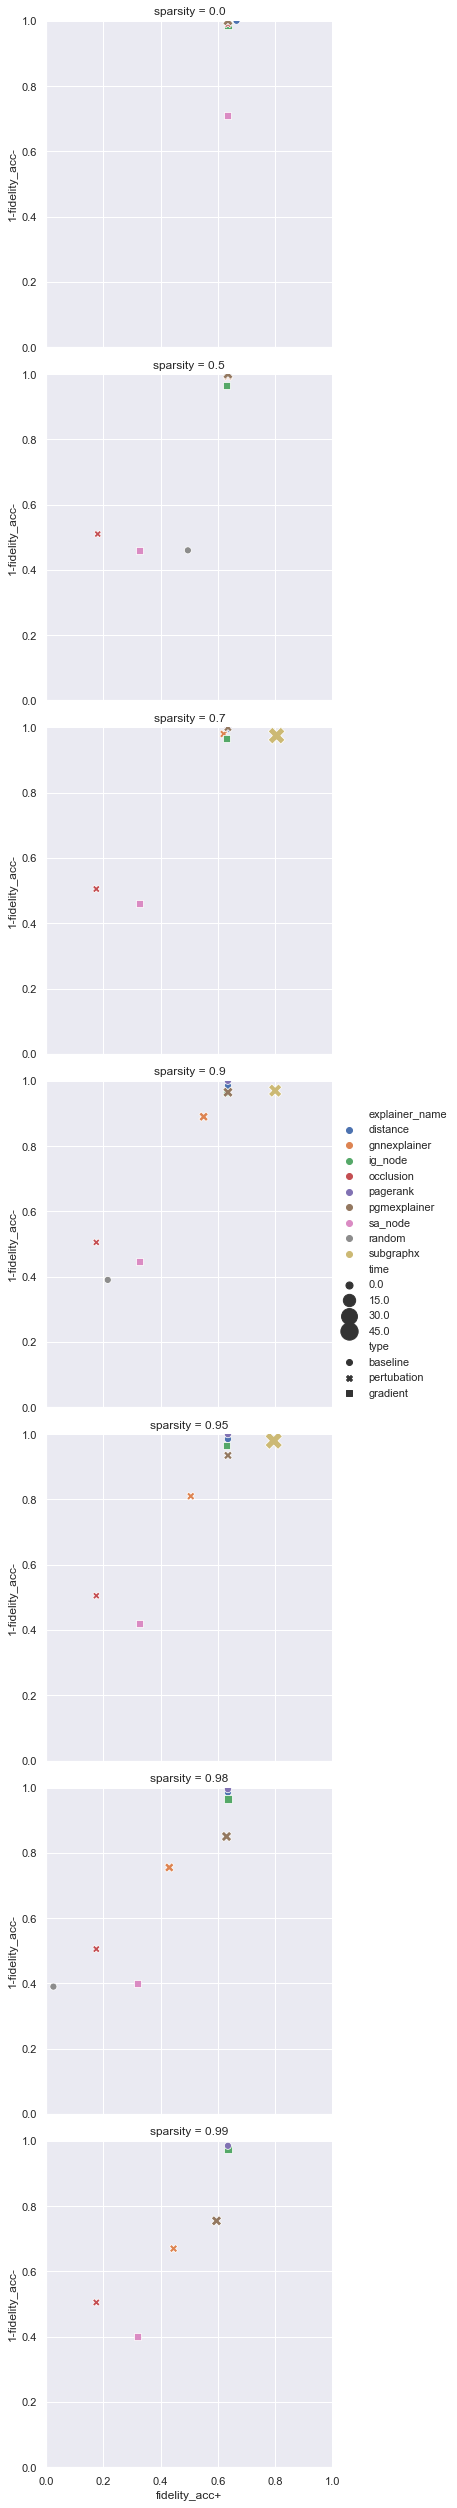

In [68]:
# Create a visualization

g = sns.relplot(
    data=df_syn1,
    x="fidelity_acc+", y="1-fidelity_acc-", row="sparsity",
    hue="explainer_name", size="time", style="type", sizes=(50, 300))

g.set(xlim=(0, 1), ylim=(0, 1))


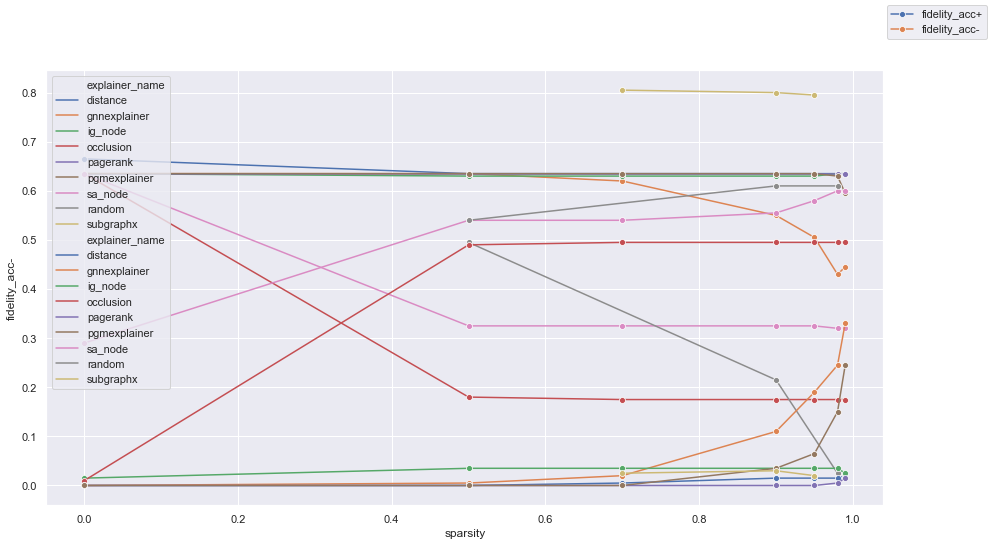

In [92]:
fig = plt.figure(figsize=(15,8))

#ax = sns.lineplot(x="sparsity", y="fidelity_acc+", hue="explainer_name", marker="o", data=df_syn1)
#for line in ax.lines:
    #line.set_linestyle("--")
    
sns.lineplot(x="sparsity", y="fidelity_acc+", hue="explainer_name", marker="o", data=df_syn1)
sns.lineplot(x="sparsity", y="fidelity_acc-", hue="explainer_name", marker="o", data=df_syn1)
fig.legend(labels=["fidelity_acc+", "fidelity_acc-"])
plt.show()

/cluster/apps/nss/gcc-6.3.0/python/3.7.4/x86_64/lib64/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


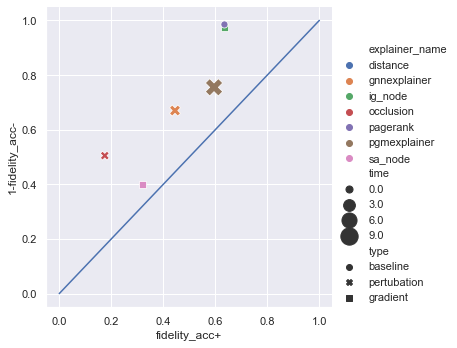

In [32]:
df_99 = df_syn1[df_syn1.sparsity==0.99]
df_99["1-fidelity_acc-"] = 1-df_99["fidelity_acc-"]
colors = sns.color_palette("tab10")


# Apply the default theme
sns.set()

# Create a visualization
ax = sns.relplot(
    data=df_99,
    x="fidelity_acc+", y="1-fidelity_acc-",
    hue="explainer_name", size="time", sizes=(50, 300), style="type"
)

plt.plot([0.0, 1.0], [0.0, 1.0])

/cluster/apps/nss/gcc-6.3.0/python/3.7.4/x86_64/lib64/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


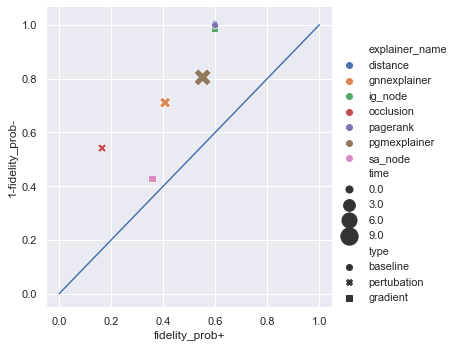

In [34]:
df_99["1-fidelity_prob-"] = 1-df_99["fidelity_prob-"]

# Create a visualization
ax = sns.relplot(
    data=df_99,
    x="fidelity_prob+", y="1-fidelity_prob-",
    hue="explainer_name", size="time", sizes=(50, 300), style="type"
)

plt.plot([0.0, 1.0], [0.0, 1.0])

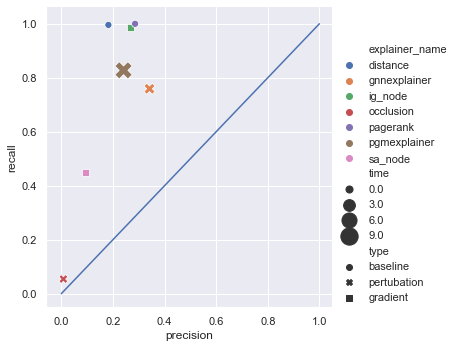

In [35]:
# Create a visualization
ax = sns.relplot(
    data=df_99,
    x="precision", y="recall",
    hue="explainer_name", size="time", sizes=(50, 300), style="type"
)


plt.plot([0.0, 1.0], [0.0, 1.0])

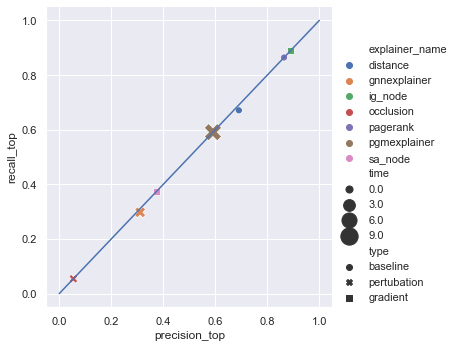

In [37]:
# Create a visualization
ax = sns.relplot(
    data=df_99,
    x="precision_top", y="recall_top",
    hue="explainer_name", size="time", sizes=(50, 300), style="type"
)

plt.plot([0.0, 1.0], [0.0, 1.0])